In [1]:
%load_ext line_profiler
%load_ext autoreload
%autoreload 2

In [7]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

from mtt.visualize import plot_mtt
from mtt.data import OnlineDataset, generate_data

rng = np.random.default_rng()

In [3]:
online_dataset = OnlineDataset(n_steps=119, sigma_position=10, length=20, img_size=128, device="cuda")
dataset = list(online_dataset)

In [4]:
positions = [info[-1]["target_positions"] for *_, info in dataset]
n_targets = np.zeros(len(positions))
for i, pos in enumerate(positions):
    n_targets[i] = (np.abs(pos) < 500).all(axis=1).sum(axis=0)
print(f"# of targets: mean = {np.mean(n_targets):0.2f}, std = {np.std(n_targets):0.2f}")
print(f"position std: {np.std(np.concatenate(positions), axis=0)}")

# of targets: mean = 10.10, std = 2.14
position std: [293.69415 274.58054]


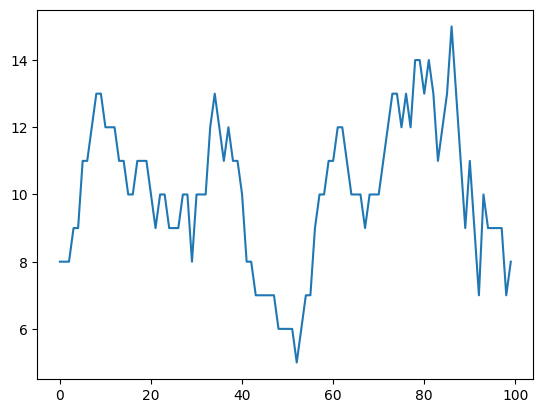

In [5]:
plt.plot(n_targets)

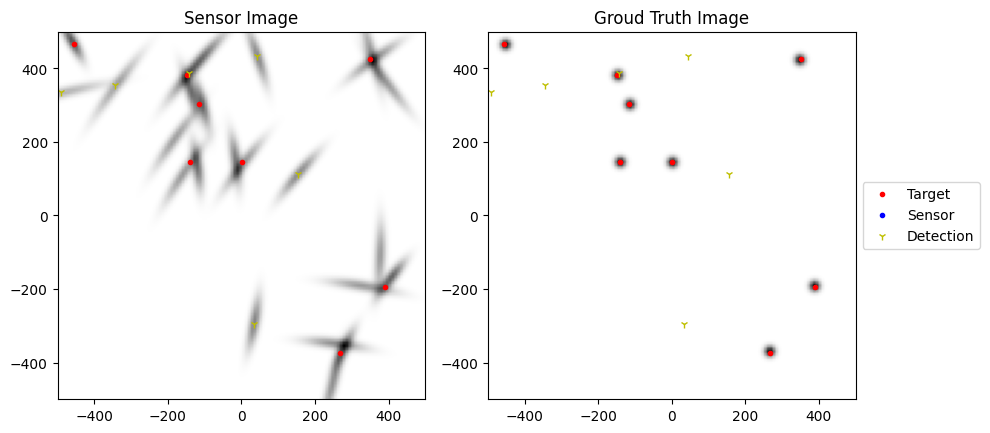

In [6]:
plot_mtt(dataset[0][0].cpu().numpy(), dataset[0][1].cpu().numpy(), dataset[0][2])
plt.show()

In [7]:
dataset_vectors = generate_data(online_dataset, n_simulations=10000)

100%|██████████| 10000/10000 [07:11<00:00, 23.17it/s]


In [30]:
for i, experiment in tqdm(enumerate(dataset_vectors), total=len(dataset_vectors)):
    experiment_data = online_dataset.collate_fn([
        online_dataset.vectors_to_images(*v) for v in experiment
    ])
    torch.save(experiment_data, f"../data/experiments/{i}.pt")

100%|██████████| 10000/10000 [1:01:07<00:00,  2.73it/s]
